In [1]:
%pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sqlalchemy import create_engine

DB_USER = "root"
DB_PASSWORD = "root"
DB_HOST = "postgres"
DB_PORT = 5432
DB_NAME = "postgres"

engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

table_name = "vento_clusters_diarios"

df = pd.read_sql(f"SELECT * FROM {table_name}", engine)
df.head()


,data,u,v,vento_velocidade,vento_rajada,vento_direcao,cluster,created_at
0,2024-01-13,1.320369,0.312008,1.625000,5.083333,70.791667,3,2025-11-28 22:23:03.222965
1,2024-01-14,1.389563,1.697105,2.220833,6.470833,40.500000,3,2025-11-28 22:23:03.222965
2,2024-01-15,1.695069,0.730898,1.875000,6.095833,65.000000,3,2025-11-28 22:23:03.222965
3,2024-01-16,2.016636,0.321031,2.120833,6.820833,79.250000,1,2025-11-28 22:23:03.222965
4,2024-01-17,1.641758,0.592836,1.887500,5.945833,68.416667,3,2025-11-28 22:23:03.222965


In [3]:
cols_stats = ["u", "v", "vento_velocidade", "vento_rajada"]

cluster_stats = (
    df.groupby("cluster")[cols_stats]
    .agg(["mean", "std", "min", "max"])
    .round(2)
)

cluster_stats


u                       v                   vento_velocidade  \
         mean   std   min   max  mean   std   min   max             mean   
cluster                                                                    
0        1.63  0.46  0.02  2.44 -2.25  0.63 -3.85 -1.31             3.07   
1        1.95  0.23  1.41  2.79 -0.14  0.71 -1.84  1.97             2.24   
2        1.17  0.44  0.57  2.01  3.05  0.64  2.22  4.01             3.39   
3        1.37  0.33  0.34  1.78  0.19  0.88 -1.93  1.95             1.87   

                          vento_rajada                     
          std   min   max         mean   std   min    max  
cluster                                                    
0        0.42  2.41  4.33         8.80  0.96  6.74  11.32  
1        0.21  1.82  2.97         7.27  0.63  5.95   9.48  
2        0.58  2.72  4.38         7.95  0.85  6.78   9.30  
3        0.22  1.28  2.39         5.82  0.66  3.58   7.11

In [4]:
import numpy as np

df["dir_rad"] = np.deg2rad(df["vento_direcao"])

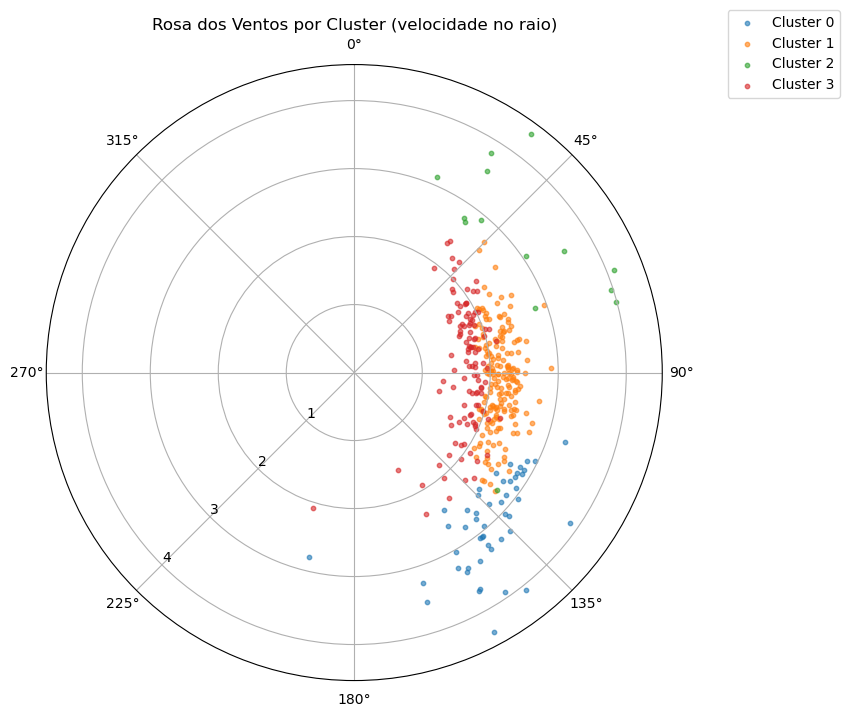

In [5]:
import matplotlib.pyplot as plt

clusters = sorted(df["cluster"].unique())

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection="polar")

for c in clusters:
    sub = df[df["cluster"] == c]
    ax.scatter(
        sub["dir_rad"],
        sub["vento_velocidade"],
        label=f"Cluster {c}",
        alpha=0.6,
        s=10,
    )

ax.set_theta_zero_location("N")   # 0° para norte
ax.set_theta_direction(-1)        # sentido horário
ax.set_title("Rosa dos Ventos por Cluster (velocidade no raio)")
ax.set_rlabel_position(225)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()
